In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

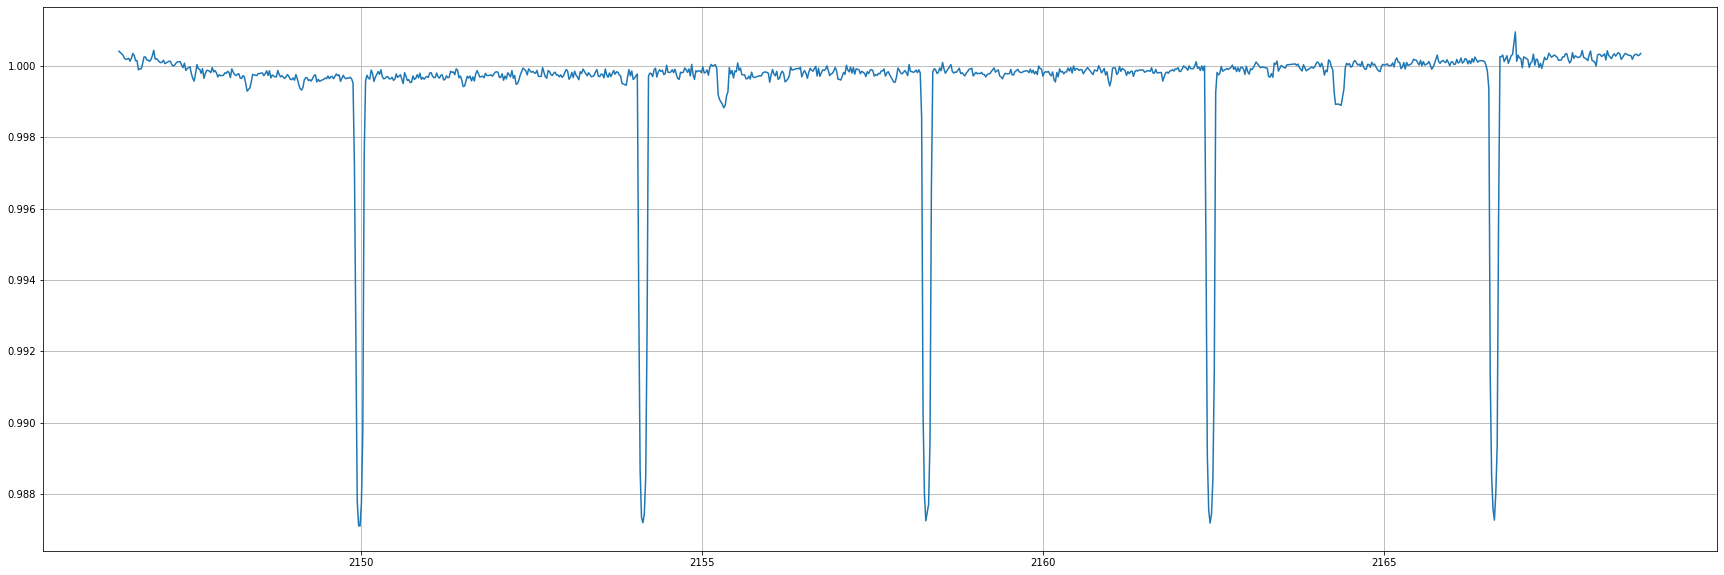

In [38]:
df=pd.read_csv("transit_data.csv")
time=df[df.columns[0]]
rb=df[df.columns[1]]
rb=np.array(rb)
plt.figure(figsize=(30,10))
plt.plot(time,rb)

plt.grid()

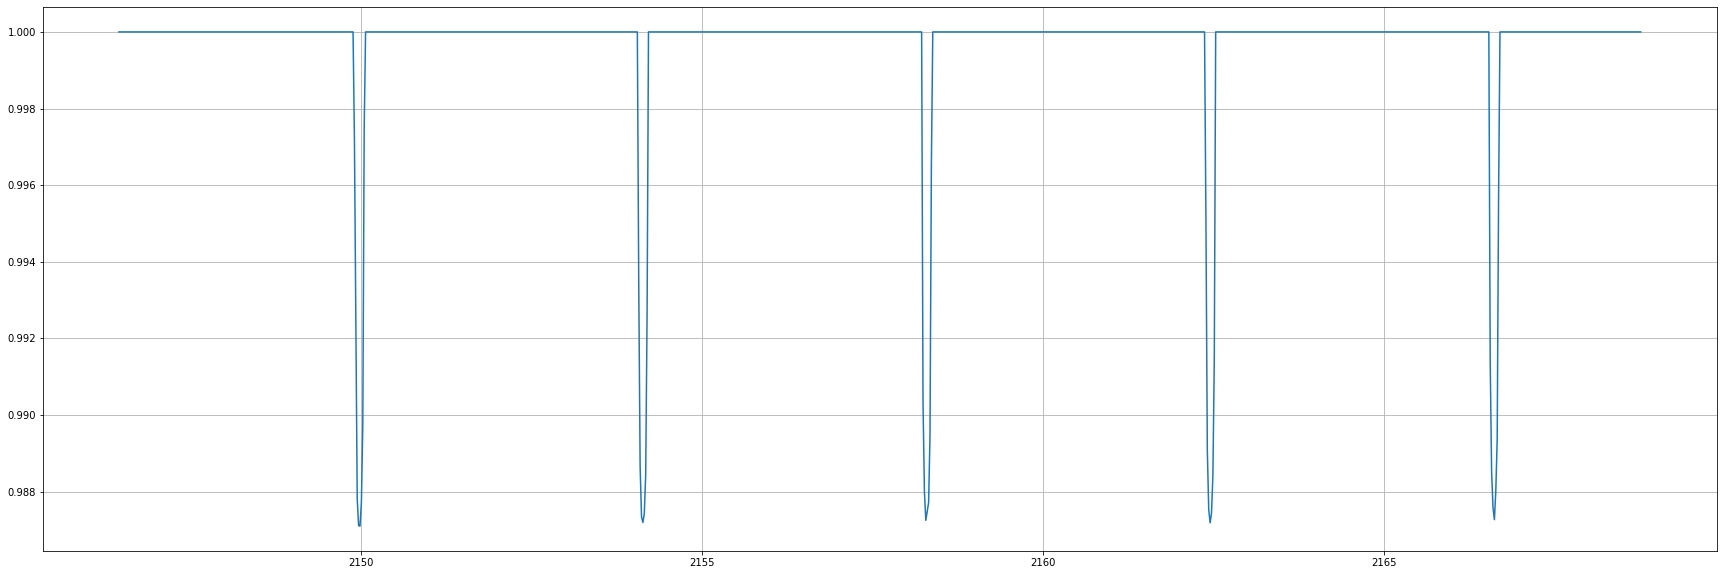

In [39]:
idx=np.where((rb)>0.998)
new_rb=rb.copy()
new_rb[idx]=1
plt.figure(figsize=(30,10))
plt.plot(time,new_rb)

plt.grid()

In [40]:
from scipy.signal import argrelextrema
R=7*(1e8)
minima=argrelextrema(new_rb,np.less)[0]
mtime=[time[i]for i in minima]
period=[time[minima[i+1]]-time[minima[i]] for i in range(0,len(minima)-1)]
sum=0
for j in range(0,len(period)):
    sum=sum+period[j]
average_time=sum/(len(period)) #orbital period

dep=0
for i in range(0,5):
    depth=1000-minima[i]
    dep=dep+depth
dip=dep/5

r=R*(np.sqrt(dip)) #radius of exoplanet
m=r/1000
print("radius of exoplanet:",round(m,2),"kms")
print("orbital period:",round(average_time,2),"earth days")


radius of exoplanet: 15068709.3 kms
orbital period: 4.16 earth days


In [41]:
start2=np.zeros(5)
k=0
for i in range(len(time)-1):
    if(new_rb[i]==1 and new_rb[i+1]!=1):
        start2[k]=i+1
        k=k+1
k=0
end2=np.zeros(5)
for i in range(len(time)-1):
    if(new_rb[i]!=1 and new_rb[i+1]==1):
        end2[k]=i
        k=k+1   
print(end2)
print(start2)             

[162. 353. 545. 728. 910.]
[156. 347. 540. 722. 904.]


In [42]:
transit=np.zeros(5)
for i in range(5):
    transit[i]=time[end2[i]]-time[start2[i]]
t_d=0
for i in range(5):
    t_d=t_d+transit[i] 
t_d=t_d/5    #transit duration

print("radius of exoplanet:",round(m,2),"kms")
print("orbital period:",round(average_time,2),"earth days")
print("transit duration:",round(t_d,2),"hours")
       

radius of exoplanet: 15068709.3 kms
orbital period: 4.16 earth days
transit duration: 0.13 hours
